In [2]:
# Basic Libraries
import pandas as pd
import numpy as np
import requests
import os
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
# Geospatial Libraries
import folium
import geopandas as gpd
# Interactive Dashboards
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
# Network Graphs
import networkx as nx
import streamlit as st
# Check available styles
print(plt.style.available)
# Set up Matplotlib and Seaborn for better visuals
plt.style.use('ggplot')  # Use a valid style name from the available list
sns.set(style='darkgrid')
# Optional: Configure Plotly to work in Jupyter Notebooks
import plotly.io as pio
pio.renderers.default = 'notebook'

/tmp/ipykernel_5400/1724494043.py:17: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/tmp/ipykernel_5400/1724494043.py:18: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
# Function to read CSV file from Google Drive
def read_csv_from_drive(url):
    try:
        # Extract file ID and create download URL
        file_id = url.split('/d/')[1].split('/')[0]
        download_url = f"https://drive.google.com/uc?id={file_id}"
        print(f"Downloading from: {download_url}")
        
        # Download the file
        response = requests.get(download_url)
        response.raise_for_status()
        
        # Save to temporary file
        temp_file = 'temp_csv.csv'
        with open(temp_file, 'wb') as file:
            file.write(response.content)
        
        # Read CSV into a DataFrame
        df = pd.read_csv(temp_file, on_bad_lines='skip')
        os.remove(temp_file)  # Clean up temporary file
        return df
    except Exception as e:
        print(f"Error reading file from {url}: {e}")
        return None

# Google Drive URLs
urls = {
    'circuits_df': 'https://drive.google.com/file/d/1-nmbX9yd1FWx41QouC4tM4NTtXrRF1nz/view?usp=sharing',
    'constructor_results_df': 'https://drive.google.com/file/d/1mVRIG28qZr-z5LJci-sT3MGKgdDv3zdR/view?usp=sharing',
    'constructor_standings_df': 'https://drive.google.com/file/d/1EbDJF5MDXOR_5igh1btuAVZJQPEYNfo0/view?usp=drive_link',
    'lap_times_df': 'https://drive.google.com/file/d/1-UalbzTCdNOMaIvNcejKi7jcfB_9ryQZ/view?usp=drive_link',
    'pit_stops_df': 'https://drive.google.com/file/d/1IGEHa6mbyjBlMUi84nKQf9Rufz0Gw0CV/view?usp=drive_link',
    'qualifying_df': 'https://drive.google.com/file/d/1oJwNLCSgjnh5wyO2qibaMME6hxL-OuC2/view?usp=drive_link',
    'results_df': 'https://drive.google.com/file/d/11vyh0O1blCuzweha8_5o60La0TJqg_rj/view?usp=drive_link',
    'seasons_df': 'https://drive.google.com/file/d/1rtkiMn7g07ZvB8U88jFlL9P4kqw_Ud2w/view?usp=drive_link',
    'sprint_results_df': 'https://drive.google.com/file/d/1nIZYslPrGQrFnwWboNa9ktIC7Uzcj2dR/view?usp=drive_link',
    'status_df': 'https://drive.google.com/file/d/1L8-FZlC8OAl6QWEEGMvr8XrLUyZepkZk/view?usp=drive_link',
    'drivers_df': 'https://drive.google.com/file/d/1fR1Y7Y1qWXZpcbpexVynH5ZewF-pBP0k/view?usp=drive_link',
    'races_df': 'https://drive.google.com/file/d/1-IKn_OpmhhJFPLmKV-KNnVCYEFzS4vjH/view?usp=drive_link',
    'constructors_df': 'https://drive.google.com/file/d/1umEG3vYsUi1-ilft5LRPSVXXb-J6DSUH/view?usp=drive_link',
    'driver_standings_df': 'https://drive.google.com/file/d/1hq2zpHLsjqmUhE51guQoazAPGVQsCwbD/view?usp=drive_link'
}

# Load DataFrames
dataframes = {name: read_csv_from_drive(url) for name, url in urls.items()}

# Print DataFrame summary
for name, df in dataframes.items():
    if df is not None:
        print(f"✅ {name}: Loaded successfully.")
        print(f"Shape: {df.shape}")
        print(f"Columns: {list(df.columns)}\n")
    else:
        print(f"❌ {name}: Failed to load.\n")

# Ensure all DataFrames are loaded
circuits_df = dataframes.get('circuits_df')
constructor_results_df = dataframes.get('constructor_results_df')
constructor_standings_df = dataframes.get('constructor_standings_df')
lap_times_df = dataframes.get('lap_times_df')
pit_stops_df = dataframes.get('pit_stops_df')
qualifying_df = dataframes.get('qualifying_df')
results_df = dataframes.get('results_df')
seasons_df = dataframes.get('seasons_df')
sprint_results_df = dataframes.get('sprint_results_df')
status_df = dataframes.get('status_df')
drivers_df = dataframes.get('drivers_df')
races_df = dataframes.get('races_df')
constructors_df = dataframes.get('constructors_df')
driver_standings_df = dataframes.get('driver_standings_df')



✅ circuits_df: Loaded successfully.
Shape: (77, 9)
Columns: ['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng', 'alt', 'url']

✅ constructor_results_df: Loaded successfully.
Shape: (12505, 5)
Columns: ['constructorResultsId', 'raceId', 'constructorId', 'points', 'status']

✅ constructor_standings_df: Loaded successfully.
Shape: (13271, 7)
Columns: ['constructorStandingsId', 'raceId', 'constructorId', 'points', 'position', 'positionText', 'wins']

✅ lap_times_df: Loaded successfully.
Shape: (575029, 6)
Columns: ['raceId', 'driverId', 'lap', 'position', 'time', 'milliseconds']

✅ pit_stops_df: Loaded successfully.
Shape: (10990, 7)
Columns: ['raceId', 'driverId', 'stop', 'lap', 'time', 'duration', 'milliseconds']

✅ qualifying_df: Loaded successfully.
Shape: (10254, 9)
Columns: ['qualifyId', 'raceId', 'driverId', 'constructorId', 'number', 'position', 'q1', 'q2', 'q3']

✅ results_df: Loaded successfully.
Shape: (26519, 18)
Columns: ['resultId', 'raceId', 'driverId', 

In [4]:
# Print only the successfully loaded tables
dataframes = {
    'circuits_df': circuits_df,
    'constructor_results_df': constructor_results_df,
    'constructor_standings_df': constructor_standings_df,
    'lap_times_df': lap_times_df,
    'pit_stops_df': pit_stops_df,
    'qualifying_df': qualifying_df,
    'results_df': results_df,
    'seasons_df': seasons_df,
    'sprint_results_df': sprint_results_df,
    'status_df': status_df,
    'drivers_df': drivers_df,
    'races_df': races_df,
    'constructors_df': constructors_df,
    'driver_standings_df': driver_standings_df
}

# Create a list to store table information
table_info = []

# Collect table and column information
for name, df in dataframes.items():
    columns = ', '.join(df.columns)
    table_info.append({'Table': name, 'Columns': columns})

# Convert the list to a DataFrame
table_info_df = pd.DataFrame(table_info)

# Display the table
print(table_info_df.to_markdown(index=False))

| Table                    | Columns                                                                                                                                                                                       |
|:-------------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| circuits_df              | circuitId, circuitRef, name, location, country, lat, lng, alt, url                                                                                                                            |
| constructor_results_df   | constructorResultsId, raceId, constructorId, points, status                                                                                                                                   |
| constructor_standings_df | constructorStandingsId, raceId, constructorId, points, position, positionText, wins    

/tmp/ipykernel_5400/1583643165.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




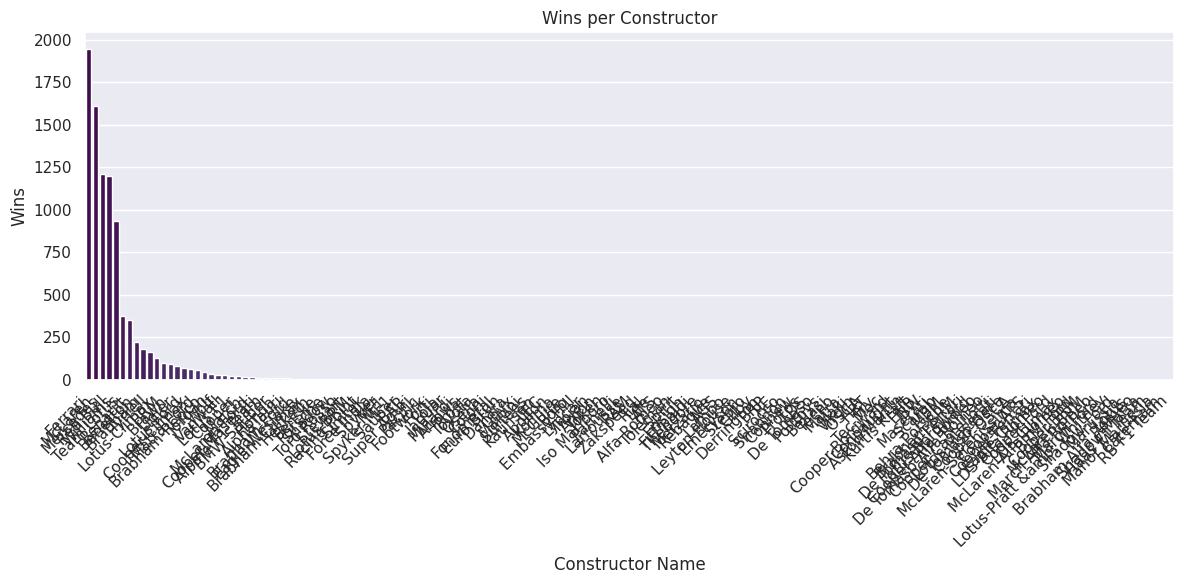

In [6]:
# Bar Graph for Wins per Constructor
plt.figure(figsize=(12, 6))
sns.barplot(
    data=constructor_wins.sort_values(by='wins', ascending=False),
    x='name',
    y='wins',
    palette='viridis'
)
plt.title("Wins per Constructor")
plt.xlabel("Constructor Name")
plt.ylabel("Wins")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipykernel_5400/2963362074.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




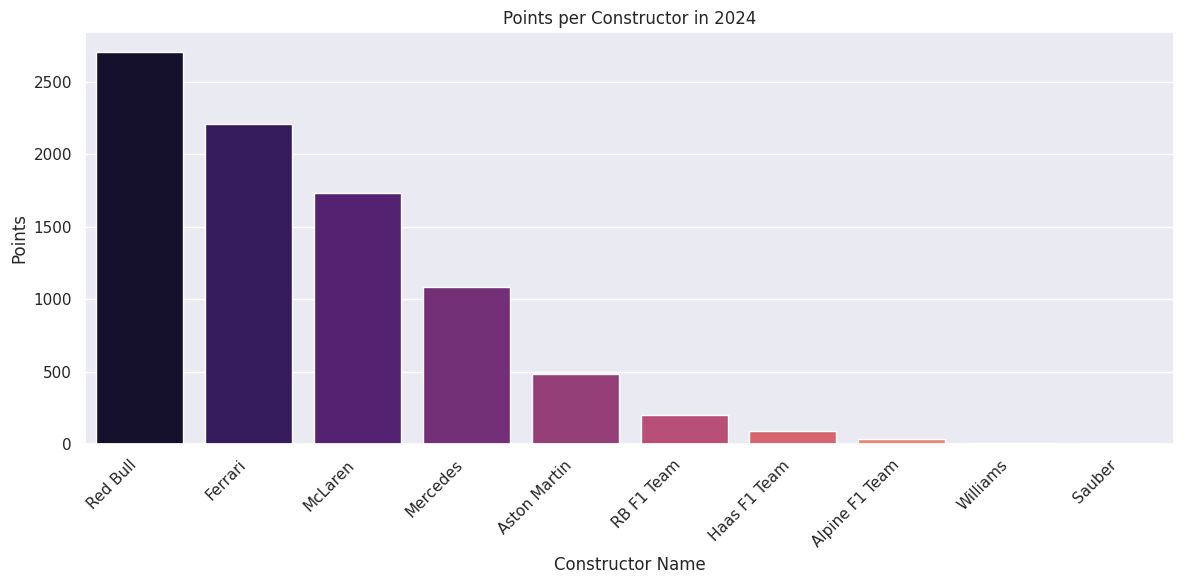

In [9]:
# Define the selected year
selected_year = 2024

# Merge constructor_standings_df with constructors_df to get constructor names
constructor_points = constructor_standings_df.merge(constructors_df, on='constructorId')

# Filter for the selected year
constructor_points = constructor_points[constructor_points['raceId'].isin(races_df[races_df['year'] == selected_year]['raceId'])]

# Group by constructor name and sum the points
constructor_points = constructor_points.groupby('name')['points'].sum().reset_index()

# Bar Graph for Points per Constructor in a Season
plt.figure(figsize=(12, 6))
sns.barplot(
    data=constructor_points.sort_values(by='points', ascending=False),
    x='name',
    y='points',
    palette='magma'
)
plt.title(f"Points per Constructor in {selected_year}")
plt.xlabel("Constructor Name")
plt.ylabel("Points")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()